In [2]:
# ---------------------HEALTH INSURANCE CLAIM PRIDICTION---------------------
#        ---------------------DATA SCIENCE---------------------

IndentationError: unexpected indent (283179488.py, line 2)

# Introduction 

According to [History.com](https://www.history.com/this-day-in-history/surgeon-general-announces-link-between-smoking-cigarettes-and-cancer), on January 11, 1964 the U.S. Surgeon General publicized a direct link between smoking cigarettes and cancer. Since that announcement people opting to smoke were aware of the risks. However, other lifestyle illnesses can result from the diets that are ingrained in culture and geographical regions.  Diabetes, obesity and high blood pressure were once deemed ailments that primarily afflicted the elderly population. However, due to exorbitant diets and seditary lifestyles it is possible for younger generations to experience these debilitating conditions. This study will examine patient age, gender, BMI (Body Mass Index), blood pressure levels, diabetic status, number of children, smoking status and region in relation to health insurance claim costs. This analysis will seek to determine people who will need to obtain medical services leading to medical claims. 


# About the Data

The dataset provides a plethora of information needed to assess health insurance claims. Factors including age, gender, Body Mass Index (BMI), blood pressure, diabetic status, number of children, region, smoking status and claim amounts are contained in the data.  


The data set was sourced by [The Devastator](https://www.kaggle.com/thedevastator)

The dataset was created by [Sumit Kumar Shukla](https://data.world/sumitrock)

View dataset:
https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health


# Data Importing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/insurance-claim-analysis-demographic-and-health/insurance_data.csv


In [2]:
#Load data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Load dataset
df = pd.read_csv("/kaggle/input/insurance-claim-analysis-demographic-and-health/insurance_data.csv")

# View column names

df.columns

Index(['index', 'PatientID', 'age', 'gender', 'bmi', 'bloodpressure',
       'diabetic', 'children', 'smoker', 'region', 'claim'],
      dtype='object')

# Data Outline

In [4]:
# Display first 5 rows
df.head() 

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [5]:
#View number of rows and columns
df.shape

(1340, 11)

# Data Cleaning

In [6]:
# Locating missing values
df.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [7]:
# Drop missing values from age and region
df = df.dropna()

In [8]:
# Confirm missing values from age and region have been dropped
df.isna().sum().sum()

0

In [9]:
df.duplicated().sum()

0

In [10]:
# Remove irrelavent columns
df = df.drop(['index','PatientID'], axis=1)
df.shape

(1332, 9)

In [11]:
# Change value in diabetic column from Yes and No to diabetic and non-diabetic.
# Replace values in children column to represent number of children.
# Change value in smoker column from Yes and No to smoker and non-smoker.

df['diabetic'] = df['diabetic'].replace({'Yes': 'diabetic', 'No': 'non-diabetic'})
df['children'] = df['children'].replace({0 : 'none', 1 : 'one', 2:'two', 3:'three', 4:'four', 5:'five', 6:'six'})
df['smoker'] = df['smoker'].replace({'Yes': 'smoker', 'No': 'non-smoker'})

In [12]:

# Organize ages into generational groups

age_range = [13,28,46,58,61]
labels = ['Gen Z','Millennials', 'Gen X', 'Baby Boomers']
df['age_group'] = pd.cut(df['age'], age_range,labels=labels)
ageGroup = df[['age_group', 'claim']].groupby('age_group').mean().sort_values(by="claim", ascending=True)





In [13]:
# Create column with bmi ranges corresponding to Healthy Weight, Overweight and Obese. 

#bmi_range = [15.5,24.9,29.9,60]
bmi_range = [15.5,18.5,24.9,29.9,60]

labels = ['Underweight','Healthy Weight', 'Overweight', 'Obese']
#df['bmi_group'] = pd.cut(df['bmi'], bins=bmi_range)
df['bmi_group'] = pd.cut(df['bmi'], bmi_range, labels=labels)
bmiGroup = df[['bmi_group', 'claim']].groupby('bmi_group').mean().sort_values(by="claim", ascending=True)
#labels = ['Healthy Weight', 'Overweight', 'Obese']




In [14]:
#Create column with blood pressure ranges corresponding to Normal Blood Pressure, Elevated Blood Presure, Hypertension Stage 1 
# and Hypertension Stage 2

bloodpressure_range = [71,120,129,139,148]
labels = ['Normal Blood Pressure', 'Elevated Blood Pressure', 'Hypertension Stage 1','Hypertension Stage 2']
df['bloodpressure_group'] = pd.cut(df['bloodpressure'], bloodpressure_range, labels = labels)
bloodpressureGroup = df[['bloodpressure_group', 'claim']].groupby('bloodpressure_group').mean().sort_values(by="claim", ascending=True)


# Data Details

In [15]:
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group,bmi_group,bloodpressure_group
0,39.0,male,23.2,91,diabetic,none,non-smoker,southeast,1121.87,Millennials,Healthy Weight,Normal Blood Pressure
1,24.0,male,30.1,87,non-diabetic,none,non-smoker,southeast,1131.51,Gen Z,Obese,Normal Blood Pressure
7,19.0,male,41.1,100,non-diabetic,none,non-smoker,northwest,1146.80,Gen Z,Obese,Normal Blood Pressure
8,20.0,male,43.0,86,non-diabetic,none,non-smoker,northwest,1149.40,Gen Z,Obese,Normal Blood Pressure
9,30.0,male,53.1,97,non-diabetic,none,non-smoker,northwest,1163.46,Millennials,Obese,Normal Blood Pressure
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,44.0,female,35.5,88,diabetic,none,smoker,northwest,55135.40,Millennials,Obese,Normal Blood Pressure
1336,59.0,female,38.1,120,non-diabetic,one,smoker,northeast,58571.07,Baby Boomers,Obese,Normal Blood Pressure
1337,30.0,male,34.5,91,diabetic,three,smoker,northwest,60021.40,Millennials,Obese,Normal Blood Pressure
1338,37.0,male,30.4,106,non-diabetic,none,smoker,southeast,62592.87,Millennials,Obese,Normal Blood Pressure


# Data Visualization and Analysis 

<AxesSubplot:title={'center':'Claims per Region'}, ylabel='region'>

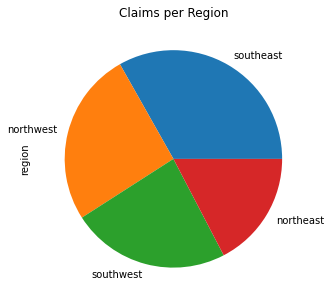

In [16]:
plt.figure(figsize = (10,5))
plt.title("Claims by Region")
df['region'].value_counts().plot(kind='pie', title = "Claims per Region")

Patients in the Southeast and Northwest were recipients of the most health insurance claims.  


<AxesSubplot:title={'center':'Gender by Region'}, xlabel='gender', ylabel='count'>

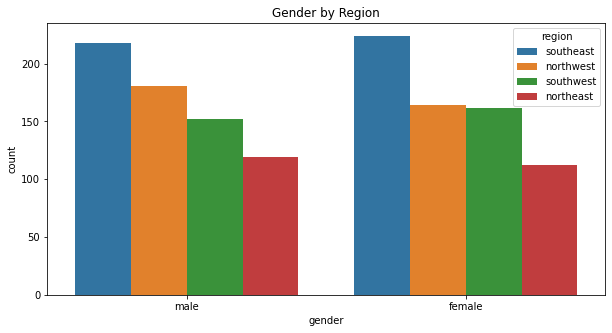

In [17]:
plt.figure(figsize = (10,5))
#plt.subplot(1,2,1)

plt.title("Gender by Region")
sns.countplot(x = 'gender', hue = 'region', data = df)


Females received slightly more claims than their male counterparts in the Southeast. There is a significant difference in the number of claims in the Southeast and Northeast. 

<AxesSubplot:title={'center':'Claims per Age Group'}, ylabel='age_group'>

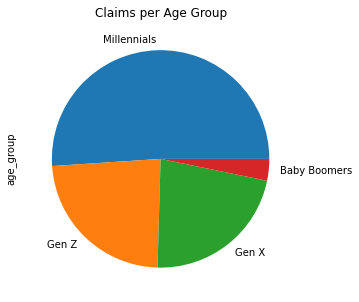

In [18]:
plt.figure(figsize = (10,5))

df['age_group'].value_counts().plot(kind='pie', title = "Claims per Age Group")

Millennials received the most health insurance claims in the United States. 

<AxesSubplot:title={'center':'BMI Ranges'}, ylabel='bmi_group'>

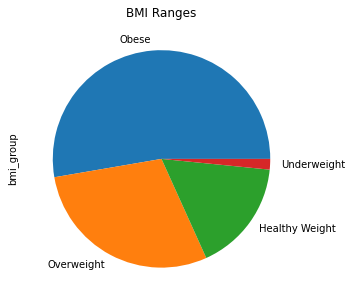

In [19]:
plt.figure(figsize = (10,5))
df['bmi_group'].value_counts().plot(kind='pie', title = "BMI Ranges")

<AxesSubplot:title={'center':'BMI and Claim Amount'}, xlabel='bmi', ylabel='claim'>

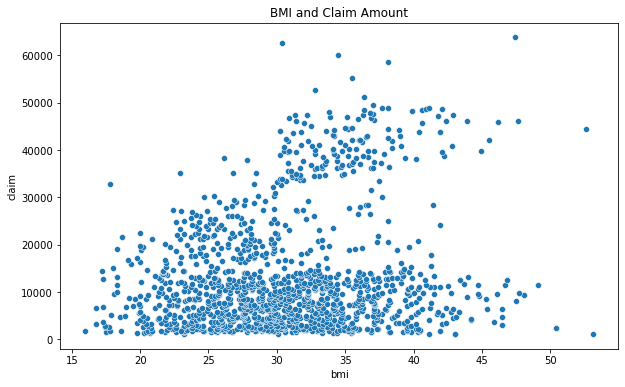

In [20]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))


# Add title
plt.title("BMI and Claim Amount")


sns.scatterplot(x=df['bmi'], y=df['claim'])

Text(0, 0.5, 'Claim Amounts')

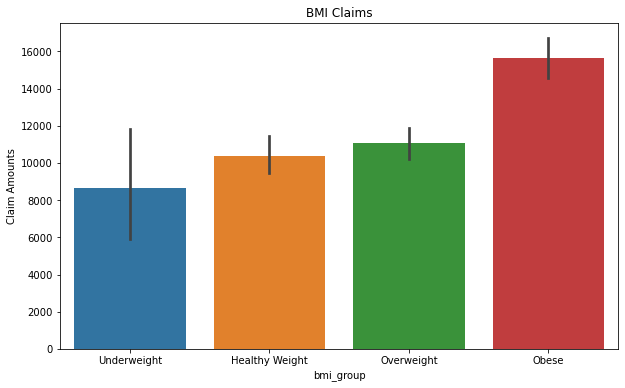

In [21]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("BMI Claims")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df.bmi_group, y=df['claim'])

# Add label for vertical axis
plt.ylabel("Claim Amounts")

According to the [CDC](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html#InterpretedAdults), BMI that is between 18.5 to 24.9 indicates a healthy weight for men and women 20 years old or older. BMI between 25.0 and 29.9 indicates overweight and 30 and above is classified as obese. Below 18.5 is classified as underweight


The majority of patients receiving health insurance claims are obese. The cost of the claims for patients with BMI 30 and above 
ranges broadly from less than 10,000 to above 60,000. 


<AxesSubplot:title={'center':'Correlation between Blood Pressure and Generation'}, xlabel='age_group', ylabel='count'>

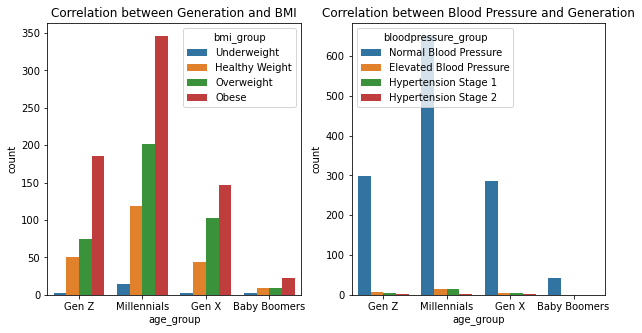

In [22]:
# Sub plot

# plt.subplot(#Total number of rows, total number of columns, plot number)
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)

plt.title("Correlation between Generation and BMI")
sns.countplot(x ='age_group', hue = 'bmi_group', data = df)


plt.subplot(1,2,2)

plt.title("Correlation between Blood Pressure and Generation")
sns.countplot(x = 'age_group', hue = 'bloodpressure_group', data = df)

According to [USC Libraries](https://libguides.usc.edu/busdem/age#:~:text=Baby%20Boomers%3A%201946%20%2D%201964,%2F%20iGen%20%2F%20Centennials%201995%20%2D%202010), the following list of years are ascribed to generational age groups: Gen Z 1995 - 2010, Millennials 1977-1995, Gen X 1965-1976 and Baby Boomers 1946-1964.

[Heart.org](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings) lists  the systolic mm Hg, (upper number) blood pressure ranges less than 120 as normal, 120-129 elevated, 130 -139 High Blood Pressure (Hypertension) Stage 1, 140 or higher High Blood Pressure (Hypertension) Stage 2, higher than 180 Hypertensive crisis. The data set did not include any patients that experienced a hypertensive crisis. 

There are significantly more obese patients that are millennials than any other age group. The majority of millennials have normal blood pressure ranges. However, millennials have more elevated blood pressure and hypertension stage 1 blood pressure ranges than any other age group. 


<AxesSubplot:xlabel='age_group', ylabel='count'>

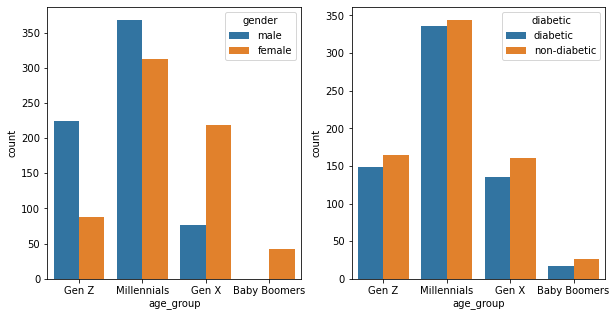

In [23]:
# Sub plot

# plt.subplot(#Total number of rows, total number of columns, plot number)
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'age_group', hue = 'gender', data = df)

plt.subplot(1,2,2)
sns.countplot(x ='age_group', hue = 'diabetic', data = df)

Millennial males and females received a higher proportion of claims than any other age group.  While a significant number of claim recipients are diabetic, there is a very small variance between diabetic and non-diabetic across all age groups.



<AxesSubplot:xlabel='age_group', ylabel='count'>

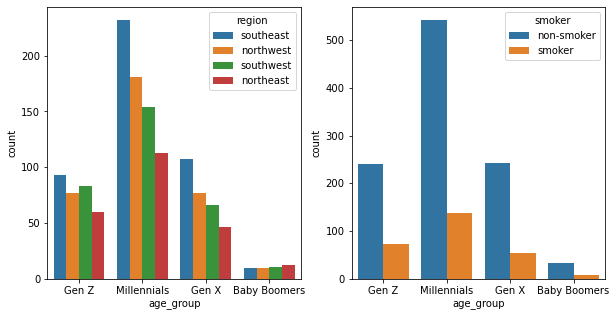

In [24]:
# Sub plot

# plt.subplot(#Total number of rows, total number of columns, plot number)
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'age_group', hue = 'region', data = df)

plt.subplot(1,2,2)
sns.countplot( x = 'age_group', hue = 'smoker', data = df)

Throughout the United States, millennials received the majority of health insurance claims. The majority of claim recipients were non-smokers. 

<AxesSubplot:title={'center':'Correlation of Generations and Children'}, xlabel='age_group', ylabel='count'>

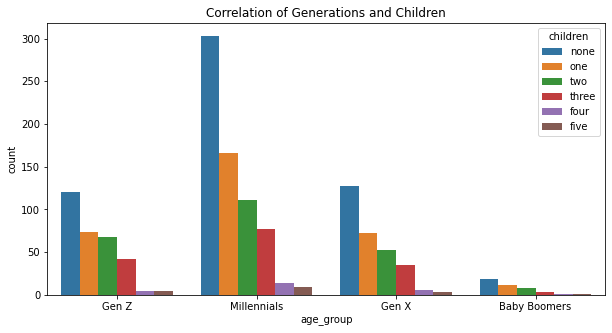

In [25]:


# plt.subplot(#Total number of rows, total number of columns, plot number)
plt.figure(figsize = (10,5))

# Add title 
plt.title("Correlation of Generations and Children")

# Bar chart showing correlation between age groups and generations
sns.countplot( x = 'age_group', hue = 'children', data = df)


Millenials are parents to the highest number of childern under the age of 18 years old. 

Text(0, 0.5, 'Claim Amount')

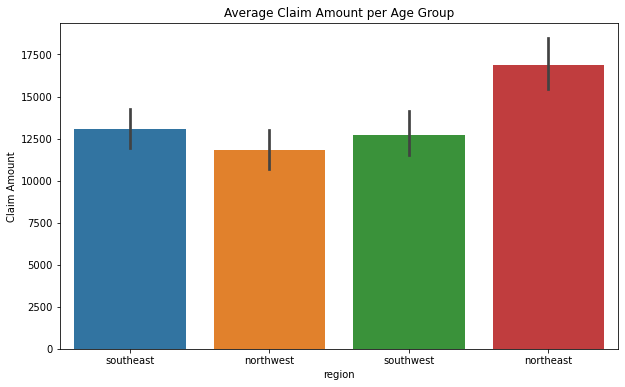

In [26]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average Claim Amount per Age Group")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df.region, y=df['claim'])

# Add label for vertical axis
plt.ylabel("Claim Amount")

The average claim amount is highest in the Northeast. 

Text(0, 0.5, 'Region')

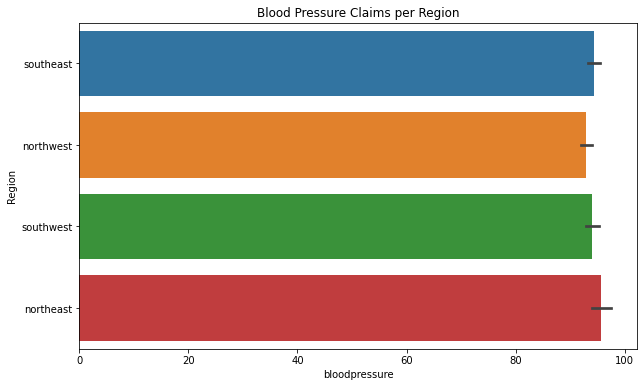

In [27]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Blood Pressure Claims per Region")

# Bar chart showing blood pressure claims by region
sns.barplot(x=df.bloodpressure, y=df['region'])

# Add label for vertical axis
plt.ylabel("Region")

Patients in the Southeast and Northeast have the highest blood pressure. However, blood pressure less than 120 is classified 
as normal. 

# Problems

Patients in the Southeast have significantly more claims than any other region. The vast majority of these claims are among millennials. Obesity is a prevalent factor among claim recipients. This is of great concern due to millennials being parents to the majority of children currently under 18 years old. If this pattern continues future generations will be prone to obesity which will lead to perpetual illness and excessive medical costs. 


# Solutions

According to the [CDC](https://www.cdc.gov/healthyschools/nutrition/school_nutrition_education.htm), 40 to 50 hours of nutritional education per year are needed to positively affect behavior change. Currently U.S. students receive less than 8 hours of nutritional education each year. School administrators and teachers have the ability to literally shape the future.  Opportunities to teach healthy lifestyles are abundant in all grades. Teaching math by counting fruits and vegetables, planting school gardens and introducing tasty healthy food options in the cafeteria are just a few ways that children can be taught to eat to live instead of living to eat. 


# Next Steps 

State and local government officials should coordinate with school administrators to ensure schools have the needed resources to teach healthy eating habits.  Teachers should enlist the help of their students when creating lessons that center on healthy lifestyles. Additionally, some activities and events can be structured to include the entire family.  These actions will put millennials and their children on track to better health outcomes. 